In [1]:
import os
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import rc

# Tufte's Line Chart

In [14]:
# %%  matplotlib viz setup
rc('font',**{'family':'sans-serif','sans-serif':['Avant Garde']})
rc('text', usetex=False)

In [3]:
# %% setup
wd = os.getcwd()

In [4]:
# %% load dataset

# file to source
in_file = os.path.join(wd, 'data', 'movieIndustry', 'lead_actor_race.csv')

# read data
years, n, perc = [], [], []
with open(in_file, 'r') as pipe:
    for line in pipe.readlines()[1:]:   # start from the second row because first row is the headers of each column 
        parsed = line.split(',')
        years.append(int(parsed[0]))
        n.append(int(parsed[1]))
        perc.append(float(parsed[2].strip()))

In [5]:
years

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [6]:
n

[172, 172, 174, 163, 168, 173, 167, 139, 145]

In [7]:
perc

[10.5, 15.1, 16.7, 12.9, 13.6, 13.9, 19.8, 26.6, 27.6]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


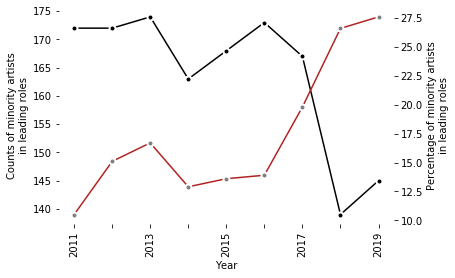

In [15]:
# %% viz

# create figure
fig = plt.figure(figsize=(6, 4))

# add plot
ax = fig.add_subplot(111)

# populate plot
ax.plot(years, n, marker='o', color='k', markersize=6, markerfacecolor='k',
        markeredgecolor='w', markeredgewidth=2)

# hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#  axes
ax.set_xlabel('Year')
ax.set_xticks(years)
labels = []
for i in years:
    if i % 2 !=0:
        labels.append(str(i))
    else:
        labels.append('')
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel('Counts of minority artists\nin leading roles')

# secondary axis
axr = ax.twinx()
axr.plot(years, perc, marker='o', color='firebrick', markersize=6,
         markerfacecolor='grey', markeredgecolor='white', markeredgewidth=2)

# hide the right and top spines
axr.spines['right'].set_visible(False)
axr.spines['top'].set_visible(False)
axr.spines['bottom'].set_visible(False)
axr.spines['left'].set_visible(False)

# axes
axr.set_ylabel('Percentage of minority artists\nin leading roles')

# save plot to file
out_f = os.path.join(os.getcwd(), 'tufte_linechart.png')
plt.savefig(out_f,
            transparent=True,
            bbox_inches='tight',
            pad_inches=0,
            dpi=600)

# show plot
plt.show()